In [1]:
import os, sys, numpy as np
import matplotlib.pyplot as plt

if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")
print(f"Current path: {os.getcwd()}")
sys.path.append('./')

from regressors.gaussianprocess import HeteroscedasticGaussianProcessRegressorRBF, GaussianProcessRegressorRBF

Current path: /Users/marcomussi/git/PricingComplementaryProducts


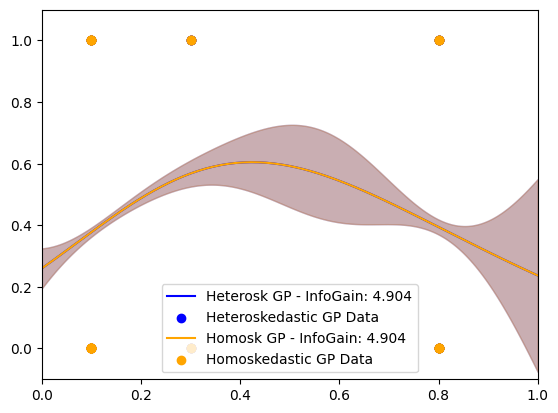

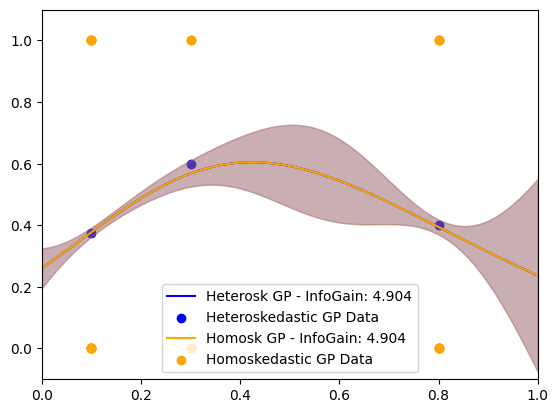

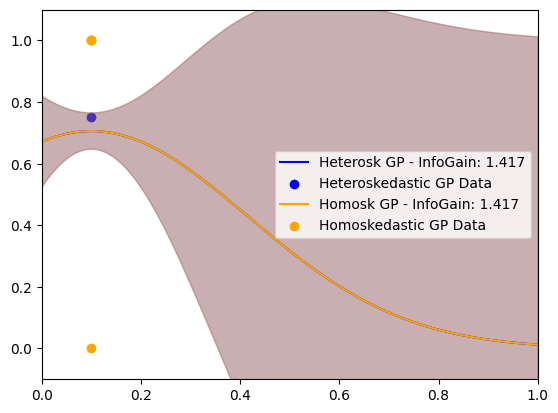

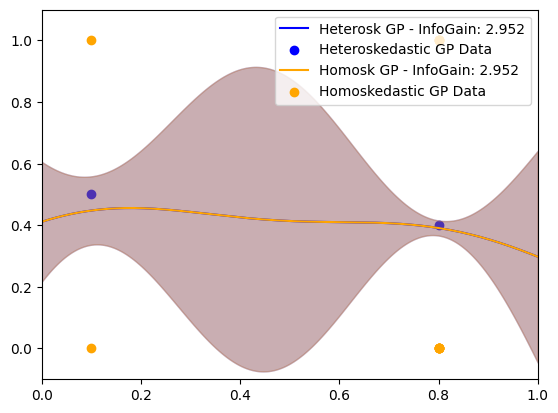

In [2]:
kernel_L = 5
base_sigma_sq = 0.25
n_samples_plt = 200
x_plt = np.linspace(0, 1, n_samples_plt)

for dataset in [1, 2, 3, 4]:

    if dataset == 1:
        data_x = np.vstack((0.1 * np.ones((16, 1)), 0.3 * np.ones((5, 1)), 0.8 * np.ones((10, 1))))
        data_y = np.vstack((np.ones((6, 1)), np.zeros((10, 1)), np.ones((3, 1)), np.zeros((2, 1)), np.ones((4, 1)), np.zeros((6, 1))))
        data_x_aggr = data_x
        data_y_aggr = data_y
        sigma_sq_aggr = base_sigma_sq * np.ones((31, 1))
        
    if dataset == 2:
        data_x_aggr = np.array([0.3, 0.8, 0.1]).reshape(-1, 1)
        data_y_aggr = np.array([3/5, 4/10, 3/8]).reshape(-1, 1)
        sigma_sq_aggr = base_sigma_sq * np.array([1/5, 1/10, 1/16]).reshape(-1, 1)
        data_x = np.vstack((0.3 * np.ones((5, 1)), 0.8 * np.ones((10, 1)), 0.1 * np.ones((16, 1))))
        data_y = np.vstack((np.ones((3, 1)), np.zeros((2, 1)), np.ones((4, 1)), np.zeros((6, 1)), np.ones((6, 1)), np.zeros((10, 1))))

    if dataset == 3:
        data_x_aggr = np.array([0.1]).reshape(-1, 1)
        data_y_aggr = np.array([3/4]).reshape(-1, 1)
        sigma_sq_aggr = base_sigma_sq * 1 / np.array([4]).reshape(-1, 1)
        data_x = np.vstack((0.1 * np.ones((4, 1)),))
        data_y = np.vstack((np.ones((3, 1)), np.zeros((1, 1))))

    if dataset == 4:
        data_x_aggr = np.array([0.1, 0.8]).reshape(-1, 1)
        data_y_aggr = np.array([1/2, 4/10]).reshape(-1, 1)
        sigma_sq_aggr = base_sigma_sq * np.array([1/2, 1/10]).reshape(-1, 1)
        data_x = np.vstack((0.1 * np.ones((2, 1)), 0.8 * np.ones((10, 1))))
        data_y = np.vstack((np.ones((1, 1)), np.zeros((1, 1)), np.ones((4, 1)), np.zeros((6, 1))))

    plt.figure()

    hetRegressor = HeteroscedasticGaussianProcessRegressorRBF(kernel_L, base_sigma_sq, input_dim=1, one_sample_mod=False)
    hetRegressor.load_data(data_x_aggr, data_y_aggr, sigma_sq_aggr) 
    y_hat1, y_sigma1 = hetRegressor.compute(x_plt.reshape(-1, 1))
    info_het = hetRegressor.get_info_gain()
    plt.plot(x_plt, y_hat1, color="blue", label=f"Heterosk GP - InfoGain: {round(info_het, 3)}")
    plt.fill_between(x_plt, y_hat1 - y_sigma1, y_hat1 + y_sigma1, color="blue", alpha=0.3)
    plt.scatter(data_x_aggr, data_y_aggr, color="blue", label="Heteroskedastic GP Data")

    homRegressor = GaussianProcessRegressorRBF(kernel_L, base_sigma_sq, input_dim=1, keep_info_gain_estimate=True)
    homRegressor.load_data(data_x, data_y)
    y_hat2, y_sigma2 = homRegressor.compute(x_plt.reshape(-1, 1))
    info_hom = homRegressor.get_info_gain()
    plt.plot(x_plt, y_hat2, color="orange", label=f"Homosk GP - InfoGain: {round(info_hom, 3)}")
    plt.fill_between(x_plt, y_hat2 - y_sigma2, y_hat2 + y_sigma2, color="orange", alpha=0.3)
    plt.scatter(data_x, data_y, color="orange", label="Homoskedastic GP Data")

    plt.xlim([0, 1])
    plt.ylim([- 0.1, 1.1])
    plt.legend()